# Chronic Kidney Disease Prediction Project
## ---------------------------------(SLIDE -1 with picture)---------------------------------------------

# Data Collected from kaggle:  'https://www.kaggle.com/colearninglounge/chronic-kidney-disease'

## under the guidance of _______, PROJECT DONE BY :

## Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data1=pd.read_csv('train.csv')

In [4]:
train_data1.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


# SLIDE 2
## --------------(Data we have)-------------------

We have 25 features  + output class ===25+1

Id(numerical) - Patient Id Age(numerical) - age in years

Blood Pressure(numerical) - bp in mm/Hg

Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)(specific gravity (SG) is a measure of the concentration of solutes in the urine)

Albumin(nominal) - al - (0,1,2,3,4,5)(Albumin is a protein made by your liver. Albumin helps keep fluid in your bloodstream so it doesn't leak into other tissues)

Sugar(nominal) - su - (0,1,2,3,4,5) (in blood)

Red Blood Cells(nominal) - rbc - (normal,abnormal)

Pus Cell (nominal) - pc - (normal,abnormal)(Pus is a thick fluid containing dead tissue, cells, and bacteria)

Pus Cell clumps(nominal) - pcc - (present,notpresent)

Bacteria(nominal) - ba - (present,notpresent)

Blood Glucose Random(numerical) - bgr in mgs/dl

Blood Urea(numerical) -bu in mgs/dl

Serum Creatinine(numerical) - sc in mgs/dl

Sodium(numerical) - sod in mEq/L

Potassium(numerical) - pot in mEq/L

Hemoglobin(numerical) - hemo in gms

Packed Cell Volume(numerical)

White Blood Cell Count(numerical) - wc in cells/cumm

Red Blood Cell Count(numerical) - rc in millions/cmm

Hypertension(nominal) - htn - (yes,no)

Diabetes Mellitus(nominal) - dm - (yes,no)

Coronary Artery Disease(nominal) - cad - (yes,no)

Appetite(nominal) - appet - (good,poor)

Pedal Edema(nominal) - pe - (yes,no)

Anemia(nominal) - ane - (yes,no)

Class (nominal)- class - (ckd,notckd)

In [5]:
train_data1.shape

(280, 26)

## SLIDE-2 shape


### data consists of 280 obeservations and 26 features

In [6]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

In [7]:
train_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,280.0,202.928571,111.988168,1.000,110.50,202.00,302.25,399.000
age,275.0,51.454545,17.476176,2.000,42.00,55.00,65.00,90.000
bp,271.0,76.051661,14.256289,50.000,70.00,70.00,80.00,180.000
sg,244.0,1.017439,0.005746,1.005,1.01,1.02,1.02,1.025
al,245.0,1.024490,1.375805,0.000,0.00,0.00,2.00,5.000
su,242.0,0.438017,1.073193,0.000,0.00,0.00,0.00,5.000
bgr,247.0,150.186235,77.357144,70.000,100.00,124.00,171.50,490.000
bu,266.0,56.983835,51.456635,10.000,27.25,41.00,64.75,391.000
sc,268.0,3.006157,5.850085,0.400,0.90,1.30,2.80,76.000
sod,213.0,137.255869,11.677123,4.500,135.00,138.00,141.00,163.000


# ---------------------------------SLIDE-3 (ANALYSIS)------------------------------------------

NUMERICAL DATA ANALYSIS

age(Age)---2 to 90 years, mean < median )(Left skewed)

bp(Blood Pressure)--- from 50 to 180. Also, the 2nd Quartile and 3rd Quartile are same. This means,that there are many entries with bp value as 70. The mean > median  (right skewed)

bgr(Blood Glucose Random)--70 to 490

sod(Sodium)---many missing values

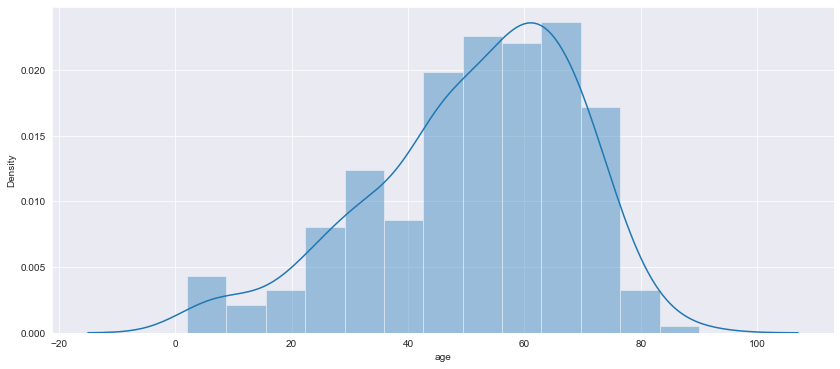

In [8]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.distplot(train_data1['age'])

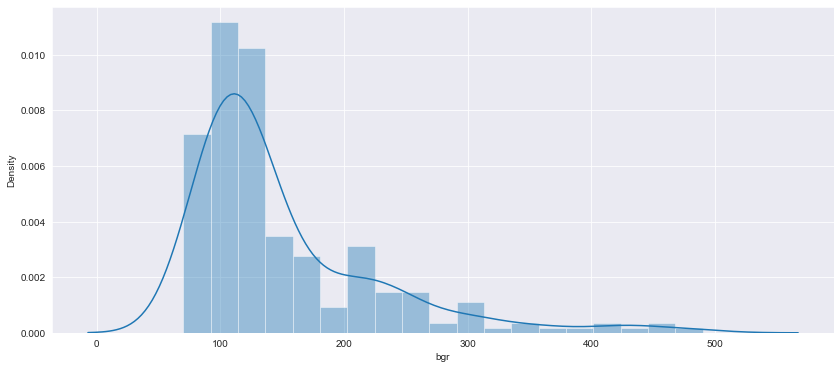

In [9]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.distplot(train_data1['bgr'])

# Numerical & Categorical Data

In [10]:
cat_var=['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
num_var=['id','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
print('Number of Categirical Variables including Label is',len(cat_var))
print('Number of Numerical Variables including Label is',len(num_var))

Number of Categirical Variables including Label is 13
Number of Numerical Variables including Label is 12


In [11]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

#### white blood cells and red blood should be numerical

In [12]:
train_data1['wc'].unique()

array(['7900', nan, '7200', '8300', '4200', '9900', '10500', '2200',
       '7500', '8400', '15700', '7000', '4700', '9600', '6700', '9000',
       '5900', '4300', '12700', '5500', '5000', '9700', '6900', '9800',
       '5800', '6400', '8100', '15200', '5600', '14900', '9100', '26400',
       '8000', '6500', '9200', '6800', '10800', '4500', '\t?', '10700',
       '11000', '9400', '6300', '10300', '9500', '6200', '6600', '4100',
       '7700', '5400', '13600', '\t8400', '11500', '10900', '12200',
       '8600', '7300', '5200', '7400', '12800', '6000', '9300', '7800',
       '10400', '8800', '10200', '16700', '8500', '21600', '12500',
       '13200', '5100', '12300', '18900', '5700', '8200', '16300', '4900',
       '14600'], dtype=object)

#### There are some values like:------   nan,\t?,\t8400.

In [13]:
train_data1['rc'].unique()

array(['3.9', nan, '5.5', '4.6', '3.4', '4.7', '6.1', '2.6', '5.6', '3.3',
       '3.8', '5.0', '4.5', '5.7', '3.5', '6.0', '5.2', '4.2', '3.7',
       '5.9', '4.9', '4.8', '3.2', '3.0', '3.6', '4.0', '2.5', '4.1',
       '6.2', '5.1', '6.5', '5.8', '4.4', '5.4', '3', '4.3', '4', '2.1',
       '8.0', '5.3', '3.1', '2.3', '\t?', '2.9', '6.3', '6.4', '2.4',
       '2.7', '5'], dtype=object)

#### There are some values like:----  nan,\t?

In [14]:
#train_data1=train_data.copy()
train_data1['wc']=pd.to_numeric(train_data1['wc'],errors='coerce')
train_data1['rc']=pd.to_numeric(train_data1['rc'],errors='coerce')

In [15]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              202 non-null    flo

### Categorical Data analysis

In [16]:
train_data1['sg'].value_counts()

1.020    74
1.010    61
1.025    57
1.015    48
1.005     4
Name: sg, dtype: int64

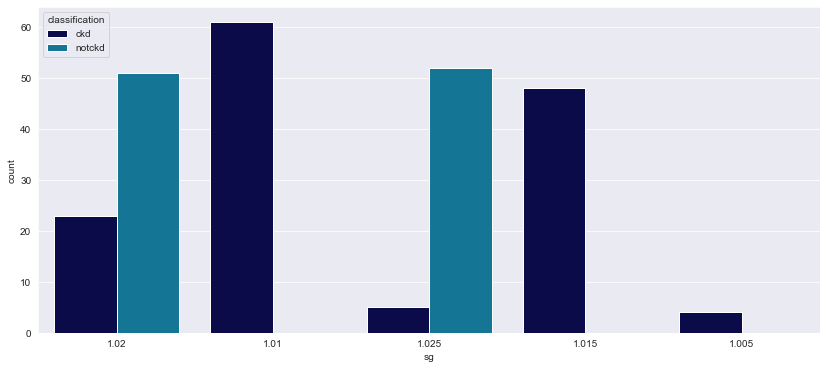

In [17]:
plt.figure(figsize=(14,6))
sns.countplot(x='sg',hue='classification',data=train_data1,order=train_data1['sg'].value_counts().index,palette='ocean')

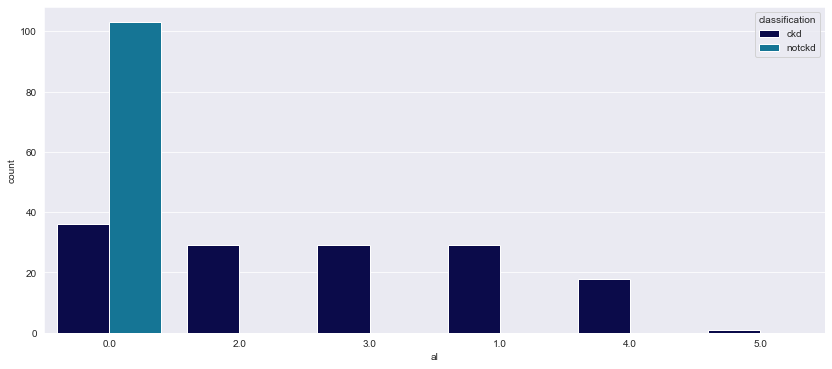

In [18]:
plt.figure(figsize=(14,6))
sns.countplot(x='al',hue='classification',data=train_data1,order=train_data1['al'].value_counts().index,palette='ocean')

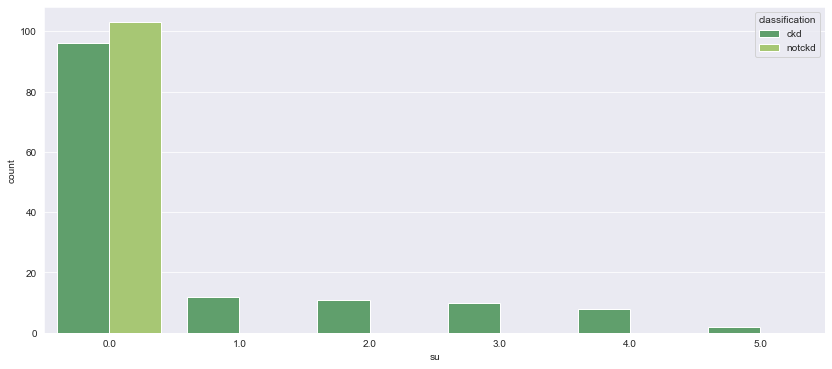

In [19]:
plt.figure(figsize=(14,6))
sns.countplot(x='su',hue='classification',data=train_data1,order=train_data1['su'].value_counts().index,palette='summer')

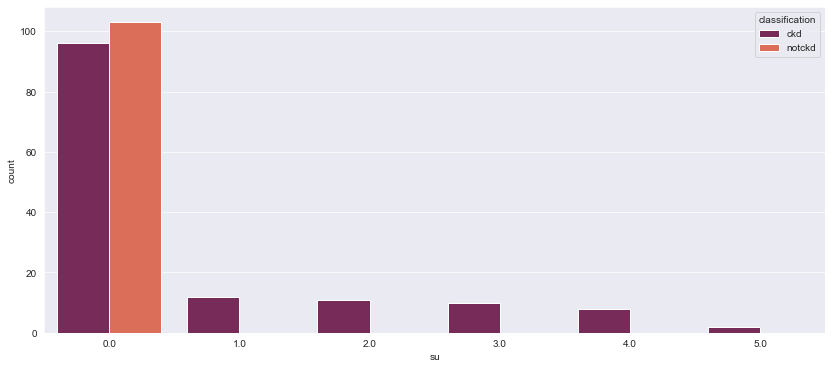

In [20]:
plt.figure(figsize=(14,6))
sns.countplot(x='su',hue='classification',data=train_data1,order=train_data1['su'].value_counts().index,palette='rocket')

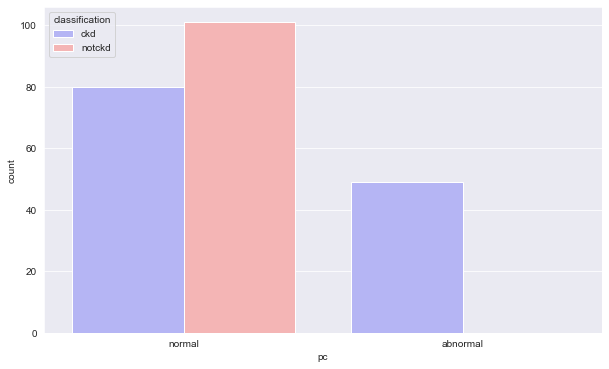

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='pc',hue='classification',data=train_data1,order=train_data1['pc'].value_counts().index,palette='bwr')

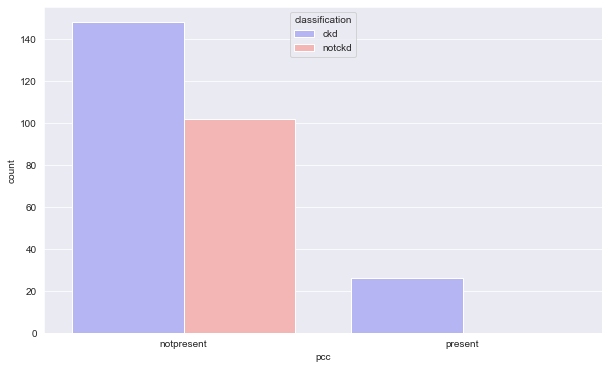

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='pcc',hue='classification',data=train_data1,order=train_data1['pcc'].value_counts().index,palette='bwr')

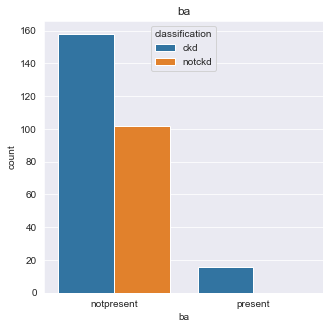

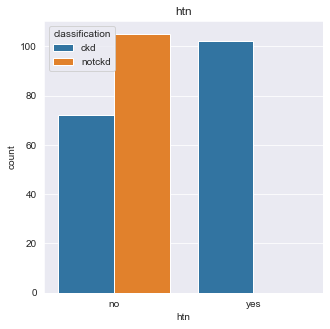

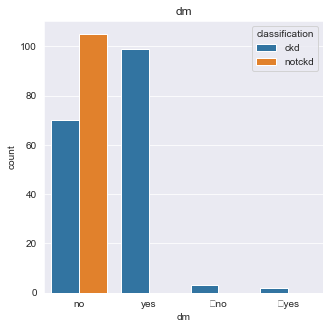

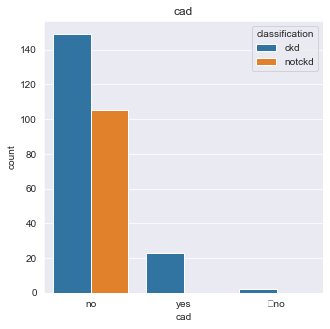

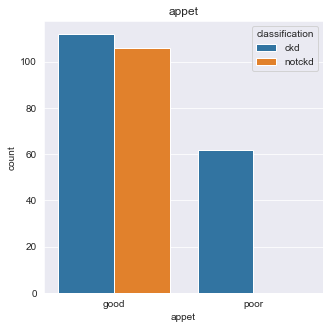

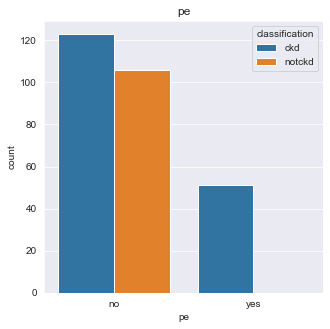

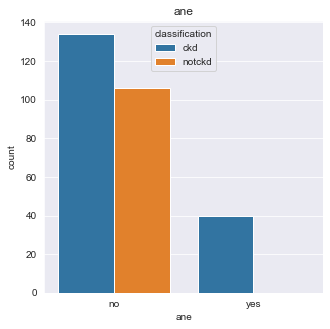

In [23]:
cats=['ba','htn','dm','cad','appet','pe','ane']
for i in cats:
  plt.figure(figsize = (5,5))
  sns.countplot(x = i, hue = 'classification', data = train_data1, order = train_data1[i].value_counts().index)
  plt.title(i)

1) For "sg" Values less than or equal to 1.015, there are only ckd cases ( that means, lower the sg values, more chances of Chronic kidney disease)

2) For "ai/"su" Values greater than or equal to 1, there are only ckd cases ( that means, higher the ai/su values, more chances of Chronic kidney disease)

3) for "rbc/pc", if they are abnormal, then its CKD.

4) for "pcc/ba", if they are present, then its CKD.

5) There seems to be extra charcters ( spaces) for columns "dm/cad". We need to trim the values in these columns and correct them.

6) for "htn/dm/cad/pe/ane", if they are yes, than its CKD.

7) for "appt", if its good, then its CKD.

## Missing Values

In [24]:
train_data1.isnull().sum()

id                  0
age                 5
bp                  9
sg                 36
al                 35
su                 38
rbc               107
pc                 50
pcc                 4
ba                  4
bgr                33
bu                 14
sc                 12
sod                67
pot                68
hemo               39
pcv                51
wc                 78
rc                 94
htn                 1
dm                  1
cad                 1
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [25]:
train_data1['dm'].unique()

array(['yes', 'no', '\tyes', '\tno', nan], dtype=object)

In [26]:
train_data1['dm']=train_data1['dm'].replace('\tyes','yes')
train_data1['dm']=train_data1['dm'].replace('\tno','no')

In [27]:
train_data1['dm'].unique()

array(['yes', 'no', nan], dtype=object)

In [28]:
train_data1['cad'].unique()

array(['no', 'yes', nan, '\tno'], dtype=object)

In [29]:
train_data1['cad']=train_data1['cad'].replace('\tno','no')

In [30]:
train_data1['cad'].unique()

array(['no', 'yes', nan], dtype=object)

In [31]:
train_data1.isnull().sum()

id                  0
age                 5
bp                  9
sg                 36
al                 35
su                 38
rbc               107
pc                 50
pcc                 4
ba                  4
bgr                33
bu                 14
sc                 12
sod                67
pot                68
hemo               39
pcv                51
wc                 78
rc                 94
htn                 1
dm                  1
cad                 1
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [32]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              202 non-null    flo

# ---------------------------------------------SLIDE-4---------------------------------------
# Handling Missing Data
## Median values for Numerical Data
## Mode values for Categorical Data

In [33]:
for j in num_var:
    train_data1[j]=train_data1[j].fillna(train_data1[j].median())

In [34]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             280 non-null    float64
 2   bp              280 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             280 non-null    float64
 11  bu              280 non-null    float64
 12  sc              280 non-null    float64
 13  sod             280 non-null    float64
 14  pot             280 non-null    float64
 15  hemo            280 non-null    float64
 16  pcv             280 non-null    float64
 17  wc              280 non-null    flo

In [35]:
for k in cat_var:
    train_data1[k]=train_data1[k].fillna(train_data1[k].mode()[0])

In [36]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             280 non-null    float64
 2   bp              280 non-null    float64
 3   sg              280 non-null    float64
 4   al              280 non-null    float64
 5   su              280 non-null    float64
 6   rbc             280 non-null    object 
 7   pc              280 non-null    object 
 8   pcc             280 non-null    object 
 9   ba              280 non-null    object 
 10  bgr             280 non-null    float64
 11  bu              280 non-null    float64
 12  sc              280 non-null    float64
 13  sod             280 non-null    float64
 14  pot             280 non-null    float64
 15  hemo            280 non-null    float64
 16  pcv             280 non-null    float64
 17  wc              280 non-null    flo

# ----------------------------SLIDE-4----------------------------------------
# Outliers

## Detected Using Z-Score and Boxplot

In [37]:
train_data1_num=train_data1[num_var].copy()

In [38]:
train_data1_num.head()

,id,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,157,62.0,70.0,122.0,42.0,1.7,136.0,4.7,12.6,39.0,7900.0,3.9
1,109,54.0,70.0,233.0,50.1,1.9,138.0,4.4,11.7,41.0,7900.0,4.8
2,17,47.0,80.0,114.0,87.0,5.2,139.0,3.7,12.1,41.0,7900.0,4.8
3,347,43.0,60.0,108.0,25.0,1.0,144.0,5.0,17.8,43.0,7200.0,5.5
4,24,42.0,100.0,124.0,50.0,1.4,129.0,4.0,11.1,39.0,8300.0,4.6


In [39]:
train_data1_num.shape

(280, 12)

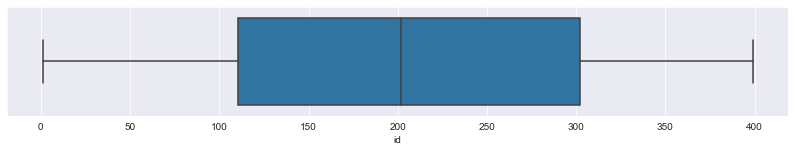

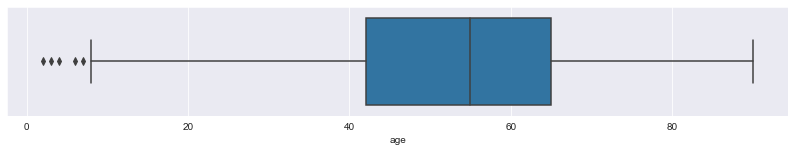

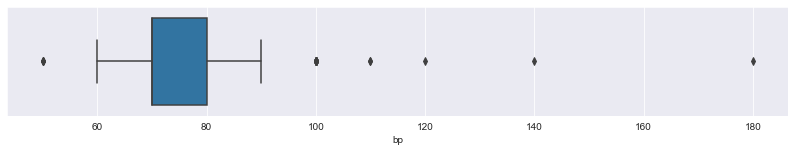

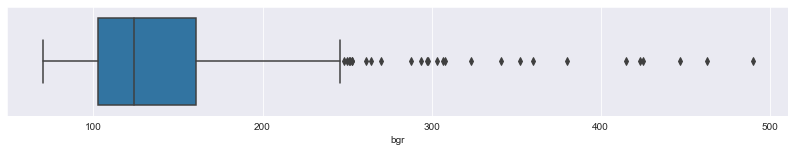

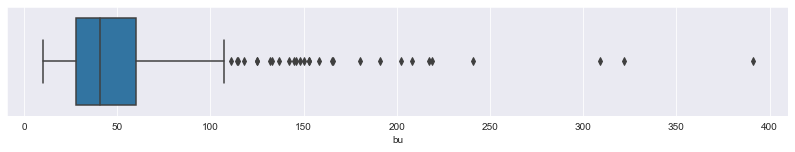

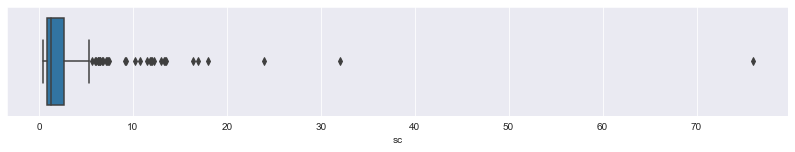

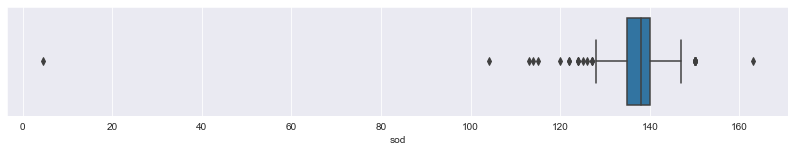

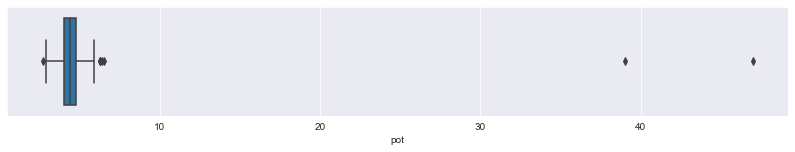

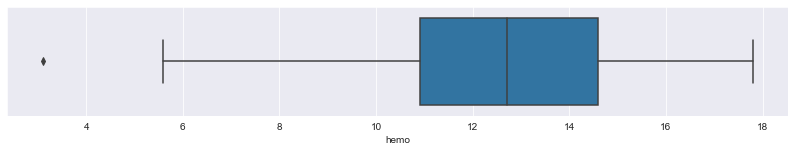

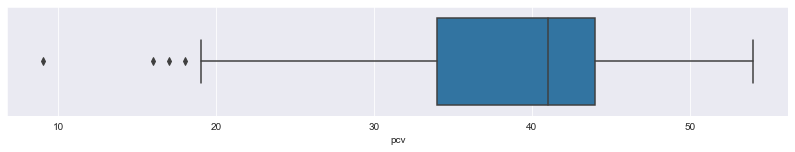

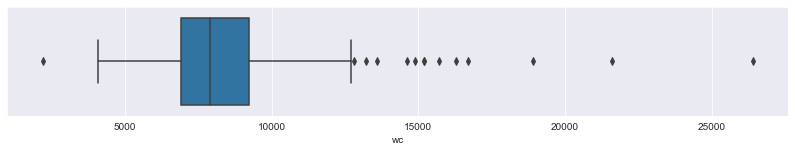

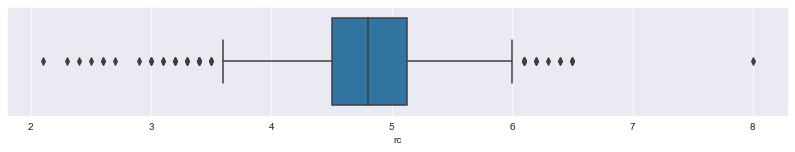

In [40]:
for e in train_data1_num.columns:
    plt.figure(figsize=(14,2))
    sns.boxplot(x=train_data1_num[e])

In [41]:
from scipy.stats import zscore
train_data1_zscores=train_data1_num.apply(zscore)

#### Z-Score is between -3 and 3

In [42]:
train_data1_zscores[~(np.abs(train_data1_zscores) < 3).all(axis=1)]

,id,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
11,-0.518200,0.316991,1.007324,-0.316445,5.297192,1.759003,-1.124757,0.039634,-1.706351,-1.949834,-1.525581,-1.716211
30,-1.761625,0.953039,-0.417175,-0.645219,-0.043536,3.681036,-3.288900,-0.200963,-0.058065,-0.440285,-0.124303,0.074173
34,-1.725843,-0.087766,-1.129424,4.697359,-0.023608,0.186431,0.055685,-0.080664,-1.181896,-1.446651,-0.124303,0.074173
36,-0.893911,1.415620,-0.417175,1.080845,3.204743,1.269759,0.055685,-0.080664,-0.882208,-0.440285,1.693572,-0.641981
57,0.313732,1.184330,1.719573,0.738372,3.683017,1.828895,-1.026387,0.039634,-1.181896,-1.446651,-0.124303,0.074173
62,-0.723947,-1.012927,-0.417175,-0.316445,3.244599,1.619219,-0.731277,-0.261112,-2.455572,0.188694,-0.124303,0.074173
64,-1.215949,-0.376879,0.295075,3.806929,-0.302601,-0.285341,0.055685,-0.080664,0.054319,0.188694,-0.124303,0.074173
65,-0.044089,0.432637,1.719573,1.437017,-0.322529,0.046647,-0.042686,0.009559,-0.507597,-1.195060,6.882090,-1.000057
73,-1.045985,0.259169,0.295075,3.669940,-0.382313,-0.180503,0.055685,-0.080664,0.054319,0.188694,-0.124303,0.074173
83,0.072203,0.143524,3.144071,-0.604122,-0.760947,-0.302814,0.055685,-0.080664,0.054319,0.188694,-0.124303,0.074173


In [43]:
train_data1_zscores[~(np.abs(train_data1_zscores)<3).all(axis=1)].shape

(25, 12)

In [44]:
from scipy import stats
for x in num_var:
    train_data1.loc[(np.abs(stats.zscore(train_data1_num[x]))>=3),x]=train_data1[x].median()

In [45]:
train_data1.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157.0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900.0,3.9,yes,yes,no,good,no,no,ckd
1,109.0,54.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7900.0,4.8,no,yes,no,good,no,no,ckd
2,17.0,47.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7900.0,4.8,yes,no,no,poor,no,no,ckd
3,347.0,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200.0,5.5,no,no,no,good,no,no,notckd
4,24.0,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300.0,4.6,yes,no,no,poor,no,no,ckd


In [46]:
train_data1.drop('id',axis=1,inplace=True)

In [47]:
train_data1.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,39.0,7900.0,3.9,yes,yes,no,good,no,no,ckd
1,54.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,233.0,...,41.0,7900.0,4.8,no,yes,no,good,no,no,ckd
2,47.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,41.0,7900.0,4.8,yes,no,no,poor,no,no,ckd
3,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,...,43.0,7200.0,5.5,no,no,no,good,no,no,notckd
4,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,124.0,...,39.0,8300.0,4.6,yes,no,no,poor,no,no,ckd


In [48]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             280 non-null    float64
 1   bp              280 non-null    float64
 2   sg              280 non-null    float64
 3   al              280 non-null    float64
 4   su              280 non-null    float64
 5   rbc             280 non-null    object 
 6   pc              280 non-null    object 
 7   pcc             280 non-null    object 
 8   ba              280 non-null    object 
 9   bgr             280 non-null    float64
 10  bu              280 non-null    float64
 11  sc              280 non-null    float64
 12  sod             280 non-null    float64
 13  pot             280 non-null    float64
 14  hemo            280 non-null    float64
 15  pcv             280 non-null    float64
 16  wc              280 non-null    float64
 17  rc              280 non-null    flo

### rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane are categorical features

In [49]:
cat_feat=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']

In [50]:
for f in cat_feat:
    print(train_data1[f].unique())

['normal' 'abnormal']
['abnormal' 'normal']
['notpresent' 'present']
['notpresent' 'present']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['good' 'poor']
['no' 'yes']
['no' 'yes']
['ckd' 'notckd']


#### can convert them to numerical

In [51]:
conv_to_num={"rbc":     {"normal": 1, "abnormal": 0},
                "pc":     {"normal": 1, "abnormal": 0},
                "pcc":     {"present": 1, "notpresent": 0},
                "ba":     {"present": 1, "notpresent": 0},
                "htn":     {"yes": 1, "no": 0},
                "dm":     {"yes": 1, "no": 0},
                "cad":     {"yes": 1, "no": 0},
                "pe":     {"yes": 1, "no": 0},
                "ane":     {"yes": 1, "no": 0},
                "appet":     {"good": 1, "poor": 0},
                "classification":     {"ckd": 1, "notckd": 0} 
               }

In [52]:
train_data1.replace(conv_to_num,inplace=True)

In [53]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             280 non-null    float64
 1   bp              280 non-null    float64
 2   sg              280 non-null    float64
 3   al              280 non-null    float64
 4   su              280 non-null    float64
 5   rbc             280 non-null    int64  
 6   pc              280 non-null    int64  
 7   pcc             280 non-null    int64  
 8   ba              280 non-null    int64  
 9   bgr             280 non-null    float64
 10  bu              280 non-null    float64
 11  sc              280 non-null    float64
 12  sod             280 non-null    float64
 13  pot             280 non-null    float64
 14  hemo            280 non-null    float64
 15  pcv             280 non-null    float64
 16  wc              280 non-null    float64
 17  rc              280 non-null    flo

#### Finally all the values are Numerical

In [54]:
train_data1.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,1,0,0,0,122.0,...,39.0,7900.0,3.9,1,1,0,1,0,0,1
1,54.0,70.0,1.020,0.0,0.0,1,1,0,0,233.0,...,41.0,7900.0,4.8,0,1,0,1,0,0,1
2,47.0,80.0,1.020,0.0,0.0,1,1,0,0,114.0,...,41.0,7900.0,4.8,1,0,0,0,0,0,1
3,43.0,60.0,1.025,0.0,0.0,1,1,0,0,108.0,...,43.0,7200.0,5.5,0,0,0,1,0,0,0
4,42.0,100.0,1.015,4.0,0.0,1,0,0,1,124.0,...,39.0,8300.0,4.6,1,0,0,0,0,0,1


# ------------------------------------SLIDE-5-----------------------------------------
## Correaltion and Multicolinearity

In [55]:
train_data1.corr().T

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.188999,-0.183268,0.104325,0.149947,-0.043363,-0.130778,0.178975,0.054906,0.252522,...,-0.218274,0.146828,-0.267395,0.409465,0.383036,0.224940,-0.146669,0.099835,0.102855,0.257968
bp,0.188999,1.000000,-0.191908,0.130302,0.120321,-0.154502,-0.107229,0.072769,0.091459,0.162510,...,-0.235774,-0.012754,-0.173593,0.245487,0.242848,0.060332,-0.101468,-0.037093,0.199726,0.267158
sg,-0.183268,-0.191908,1.000000,-0.475982,-0.267190,0.238394,0.417175,-0.344921,-0.210826,-0.294692,...,0.506919,-0.177367,0.454488,-0.352247,-0.376636,-0.152729,0.272266,-0.249465,-0.208425,-0.674477
al,0.104325,0.130302,-0.475982,1.000000,0.323062,-0.388302,-0.566644,0.386256,0.389881,0.314308,...,-0.442101,0.206780,-0.392353,0.433380,0.349733,0.189797,-0.320043,0.426922,0.193195,0.526758
su,0.149947,0.120321,-0.267190,0.323062,1.000000,-0.058453,-0.200236,0.160796,0.106095,0.494625,...,-0.208179,0.157027,-0.172700,0.253446,0.419282,0.171714,-0.098485,0.162597,0.099916,0.293457
rbc,-0.043363,-0.154502,0.238394,-0.388302,-0.058453,1.000000,0.367855,-0.052789,-0.219299,-0.140647,...,0.239068,0.038614,0.170751,-0.132394,-0.135204,-0.111747,0.185708,-0.173641,-0.062206,-0.265302
pc,-0.130778,-0.107229,0.417175,-0.566644,-0.200236,0.367855,1.000000,-0.467970,-0.413040,-0.248053,...,0.387645,-0.057180,0.347639,-0.315440,-0.221669,-0.204532,0.252409,-0.367120,-0.268608,-0.359476
pcc,0.178975,0.072769,-0.344921,0.386256,0.160796,-0.052789,-0.467970,1.000000,0.345350,0.169459,...,-0.241696,0.114349,-0.205306,0.192512,0.195301,0.128363,-0.214655,0.167838,0.221041,0.249717
ba,0.054906,0.091459,-0.210826,0.389881,0.106095,-0.219299,-0.413040,0.345350,1.000000,0.088773,...,-0.236304,0.013492,-0.222822,0.133374,0.103447,0.206532,-0.202226,0.202743,0.075378,0.192148
bgr,0.252522,0.162510,-0.294692,0.314308,0.494625,-0.140647,-0.248053,0.169459,0.088773,1.000000,...,-0.284219,0.112820,-0.294418,0.414283,0.535366,0.194784,-0.267635,0.158523,0.112951,0.416135


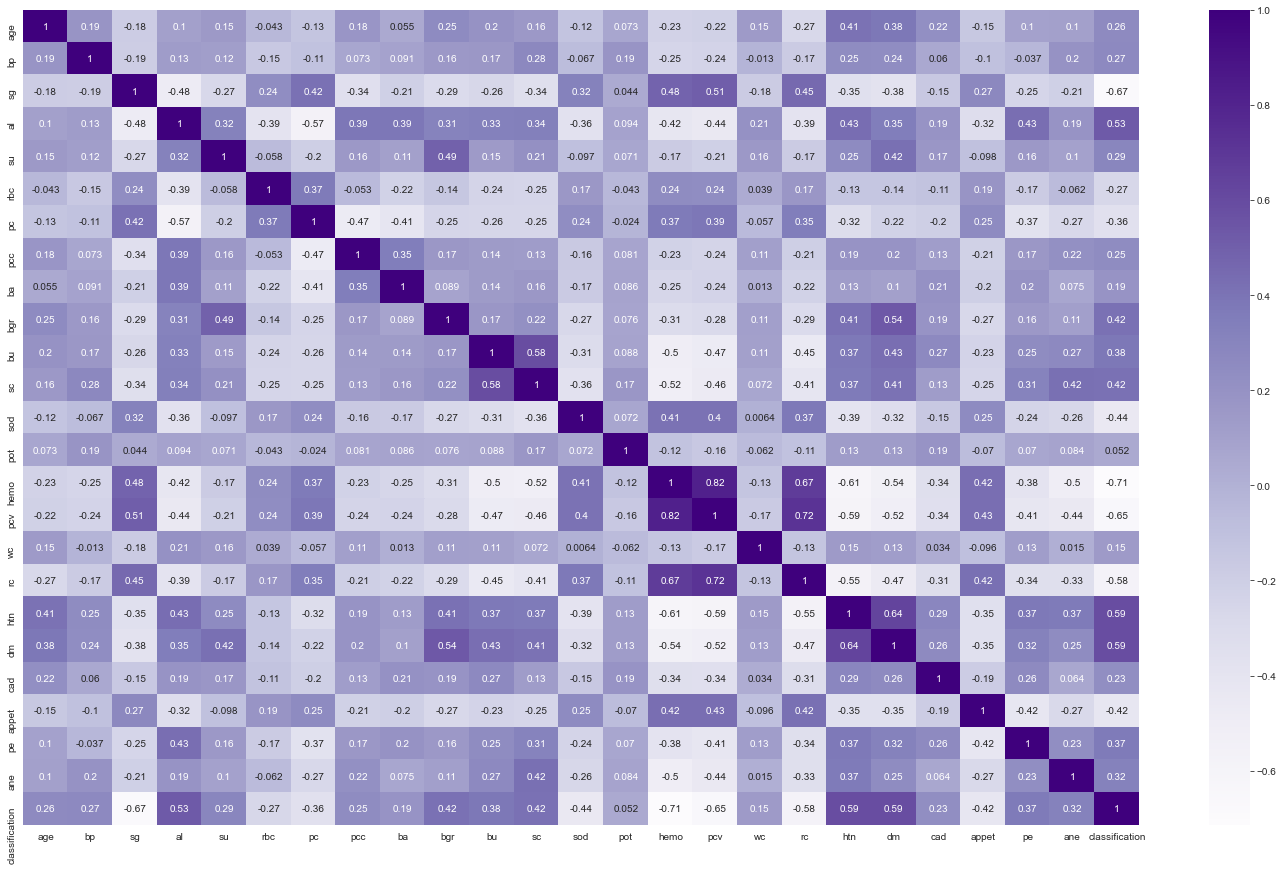

In [56]:
plt.figure(figsize=(25,15))
sns.heatmap(train_data1.corr(),annot=True,cmap='Purples')

1) pc,hemo are highly co related with 0.82

2) rc,hemo are highly co related with 0.67

3) rc,pcv are highly co related with 0.72

4) dm,htn are highly co related with 0.64

5) hemo,htn are highly co related with 0.61

### Dropping ==== hemo,pcv,htn

In [57]:
train_data1.drop('hemo',axis=1,inplace=True)

In [58]:
train_data1.drop('pcv',axis=1,inplace=True)
train_data1.drop('htn',axis=1,inplace=True)

In [59]:
train_data1.shape

(280, 22)

In [60]:
final_data=train_data1.copy()

# --------------SLIDE-6--------------
# Using Machine Learning model 
# Decision Trees
# Model Building

In [61]:
final_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sod,pot,wc,rc,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,1,0,0,0,122.0,...,136.0,4.7,7900.0,3.9,1,0,1,0,0,1
1,54.0,70.0,1.020,0.0,0.0,1,1,0,0,233.0,...,138.0,4.4,7900.0,4.8,1,0,1,0,0,1
2,47.0,80.0,1.020,0.0,0.0,1,1,0,0,114.0,...,139.0,3.7,7900.0,4.8,0,0,0,0,0,1
3,43.0,60.0,1.025,0.0,0.0,1,1,0,0,108.0,...,144.0,5.0,7200.0,5.5,0,0,1,0,0,0
4,42.0,100.0,1.015,4.0,0.0,1,0,0,1,124.0,...,129.0,4.0,8300.0,4.6,0,0,0,0,0,1


In [62]:
X=final_data.drop(['classification'],axis=1)
y=final_data['classification']

In [63]:
X.shape

(280, 21)

In [64]:
y.shape

(280,)

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [66]:
print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

X train shape:  (196, 21)
X test shape:  (84, 21)
y train shape:  (196,)
y test shape:  (84,)


In [67]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
confusion_matrix(y_test,y_pred)

array([[25,  0],
       [ 3, 56]], dtype=int64)

## -----------------------------------------Accuracy Score----------------------------------------------

In [70]:
accuracy_score(y_test,y_pred)

0.9642857142857143

## --------------------Classification Report----------------------------------

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.95      0.97        59

    accuracy                           0.96        84
   macro avg       0.95      0.97      0.96        84
weighted avg       0.97      0.96      0.96        84

